<a href="https://colab.research.google.com/github/rhazem13/MemoryMate/blob/Moamen/face_recognition_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/misbah4064/face_recognition.git
%cd face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 5), reused 23 (delta 3), pack-reused 0
Unpacking objects: 100% (26/26), 3.03 MiB | 7.19 MiB/s, done.
/content/face_recognition


In [2]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=b1d68c1f22a51f1584994768cdeb436f658a841973d4ae0fe4e695df0bec941a
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [6]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display


face_1 = face_recognition.load_image_file("elon.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]


face_2 = face_recognition.load_image_file("ertugrul.jpeg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding
]
known_face_names = [
    "Elon",
    "Ertugrul"
]
print("Done learning and creating profiles")

Done learning and creating profiles


Elon


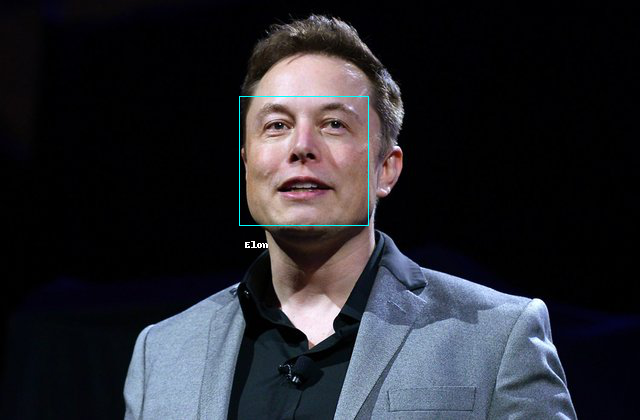

In [8]:
unknown_image = face_recognition.load_image_file("unknown_el.jpg")

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    print(name)

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    # draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height + 25), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)